In [1]:
import glob
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# -------- USER SETTINGS ----------
CALIB_DIR = "calib"

# inner corners (NOT squares). Example: a "7x5" board means (7,5) inner corners.
CHESSBOARD = (7, 5)

# Square size in meters (e.g. 20 mm = 0.020)
SQUARE_SIZE = 0.010



Left corners found: True, Right corners found: True


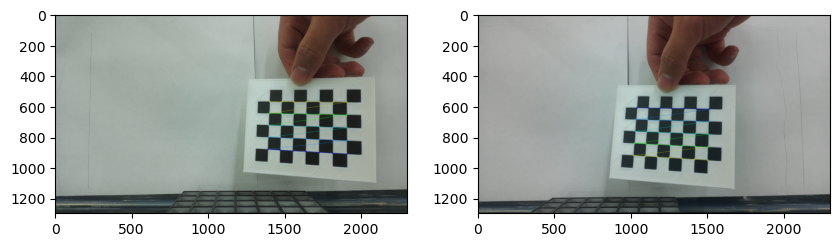

In [15]:
id=1
lp=f"calib/left_{id:02d}.png"
rp=f"calib/right_{id:02d}.png"
img_l = cv2.imread(lp, cv2.IMREAD_COLOR)
img_r = cv2.imread(rp, cv2.IMREAD_COLOR)

gray_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)

flags_find = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
ret_l, corners_l = cv2.findChessboardCorners(gray_l, CHESSBOARD, flags_find)
ret_r, corners_r = cv2.findChessboardCorners(gray_r, CHESSBOARD, flags_find)
print(f"Left corners found: {ret_l}, Right corners found: {ret_r}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.imshow(gray_l, cmap='gray')
# plt.title('Left Image')
# plt.subplot(1,2,2)
# plt.imshow(gray_r, cmap='gray')
criteria_subpix = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-4)
if ret_l:
    corners_l = cv2.cornerSubPix(gray_l, corners_l, (11, 11), (-1, -1), criteria_subpix)
    vis_l = img_l.copy()
    #vis_r = img_r.copy()
    cv2.drawChessboardCorners(vis_l, CHESSBOARD, corners_l, True)
    #cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)

    plt.imshow(vis_l)
else:
    plt.imshow(img_l)


plt.subplot(1,2,2)
if ret_r:
    corners_r = cv2.cornerSubPix(gray_r, corners_r, (11, 11), (-1, -1), criteria_subpix)
    vis_r = img_r.copy()
    #vis_r = img_r.copy()
    cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)
    #cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)

    plt.imshow(vis_r)
else:
    plt.imshow(img_r)

Left corners found: False, Right corners found: False
